In [1]:
using Plots, DelimitedFiles
include("../ensemble.jl")
include("../exact/random_regular.jl")
include("../exact/montecarlo.jl")
import ProgressMeter; ProgressMeter.ijulia_behavior(:append);

## β=1.0
This is above the ferromagnetic transition @ $β=\tanh^{-1}\left(\frac{1}{J(k-1)}\right)\approx 0.5$

In [21]:
β = 1.0
T = 50     # final time  
pᵢ⁰ = [0.75, 0.25]   # initial condition: magnetization = +0.5
ϕᵢ = [ones(2) for _ in 1:T]   # observations (none)
wᵢ = fill( GlauberFactor(ones(3), 0.0, β), T )   # transition probabilities: J=1, h=0

A = mpem2(2, T, d=1)   # initialize with bonds of dimension d
Δs = zeros(0);

Run on infinite 3-regular graph

In [ ]:
svd_trunc = TruncBond(10)
A, iters, Δs = iterate_rs_deg3(A, pᵢ⁰, wᵢ, ϕᵢ; 
    svd_trunc, maxiter=40, tol=1e-3, Δs, verbose=true, showprogress=false);


### iter 1 of 40
Δ: 0.5 / 0.001
bonds:	[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


### iter 2 of 40
Δ: 0.4391622274106246 / 0.001
bonds:	[4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4]


### iter 3 of 40
Δ: 0.35120336363724985 / 0.001
bonds:	[4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 4]


### iter 4 of 40
Δ: 0.2821482463582063 / 0.001
bonds:	[4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 4]


### iter 5 of 40
Δ: 0.25208003116141814 / 0.001
bonds:	[4, 10, 10, 10, 10, 10, 10, 10, 10


### iter 34 of 40
Δ: 0.011568973116635961 / 0.001
bonds:	[4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 4]



In [ ]:
plot(Δs, marker=:o, label="convergence error", xlabel="iter", size=(300,200), yaxis=:log10, legend=:topright)

In [ ]:
# mag = magnetization_rs_deg3(A, pᵢ⁰, wᵢ, ϕᵢ; svd_trunc);
mag = magnetization_rs(A);

Compute RS equilibrium prediction

In [ ]:
k = 3
J = 1.0
m_eq = rs_magnetization_fixedpoints(β, J, k) ;

In [ ]:
p1 = plot(0:T, mag, title="T=$T, β=$β", xlabel="time", label="MPdBP",
    ylabel="magnetiz", m=:o, titlefontsize=12, xticks=0:5:T)
hline!(p1, [m_eq[3]], ls=:dash, label="RS @equilibrium", legend=:bottomright)
ff = readdlm("montecarlo_N1000.txt", Float64)
plot!(p1, ff[1:T+1,1], ff[1:T+1,2], label="Monte Carlo", m=:diamond)
plot(p1, size=(400,400))

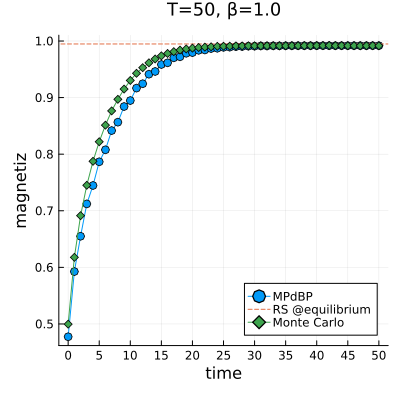

In [20]:
p1 = plot(0:T, mag, title="T=$T, β=$β", xlabel="time", label="MPdBP",
    ylabel="magnetiz", m=:o, titlefontsize=12, xticks=0:5:T)
hline!(p1, [m_eq[3]], ls=:dash, label="RS @equilibrium", legend=:bottomright)
ff = readdlm("montecarlo_N1000.txt", Float64)
plot!(p1, ff[1:T+1,1], ff[1:T+1,2], label="Monte Carlo", m=:diamond)
plot(p1, size=(400,400))

As it should be:

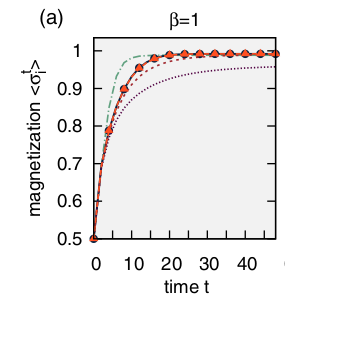